#0. Setting

In [ ]:
!pip install mxnet
!pip install gluonnlp pandas tqdm
!pip install sentencepiece
!pip install transformers==3.0.2
!pip install torch

     |████████████████████████████████| 47.3 MB 1.3 MB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 344 kB 10.1 MB/s 
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595741 sha256=7ea3c44c167f2ae5a3811baaa09e056d7787341decff4181fa3833dcbe3bbaf1
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023acffbe395d78a527eae00
Successfully built gluonnlp
     |████████████████████████████████| 1.2 MB 14.1 MB/s 
     |████████████████████████████████| 769 kB 15.5 MB/s 
     |████████████████████████████████| 3.0 MB 61.3 MB/s 
     |████████████████████████████████| 895 kB 68.7 MB/s 


In [ ]:
#깃허브에서 KoBERT 파일 로드
!pip install git+https://git@github.com/SKTBrain/KoBERT.git@master

  Cloning https://****@github.com/SKTBrain/KoBERT.git (to revision master) to /tmp/pip-req-build-xjf06r42
  Running command git clone -q 'https://****@github.com/SKTBrain/KoBERT.git' /tmp/pip-req-build-xjf06r42
     |████████████████████████████████| 132 kB 15.0 MB/s 
     |████████████████████████████████| 4.5 MB 72.0 MB/s 
     |████████████████████████████████| 3.8 MB 56.2 MB/s 
     |████████████████████████████████| 77 kB 8.3 MB/s 
     |████████████████████████████████| 6.5 MB 33.2 MB/s 
     |████████████████████████████████| 596 kB 56.2 MB/s 
     |████████████████████████████████| 79 kB 7.9 MB/s 
     |████████████████████████████████| 8.6 MB 53.0 MB/s 
     |████████████████████████████████| 127 kB 58.7 MB/s 
  Created wheel for kobert: filename=kobert-0.2.3-py3-none-any.whl size=15674 sha256=0b2f49daad0ffdaec36b0785904a6ad4357f491b577660308f1f24f0e108e2c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-_5j791lw/wheels/d3/68/ca/334747dfb038313b49cf71f84832a33372f3470d9ddfd0

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gluonnlp as nlp
import numpy as np
from tqdm import tqdm, tqdm_notebook
torch.cuda.empty_cache()
import matplotlib.pyplot as plt

In [ ]:
#kobert
from kobert.utils import get_tokenizer
from kobert.pytorch_kobert import get_pytorch_kobert_model

#transformers
from transformers import AdamW
from transformers.optimization import get_cosine_schedule_with_warmup

In [ ]:
#GPU 사용
device = torch.device("cuda:0")

#CPU 사용
# device = torch.device("cpu")

In [ ]:
#BERT 모델, Vocabulary 불러오기
bertmodel, vocab = get_pytorch_kobert_model()

/content/.cache/kobert_v1.zip[██████████████████████████████████████████████████]
/content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece[██████████████████████████████████████████████████]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/빅데이터 핀테크 전문가/딥러닝 팀프로젝트/data/news_total.csv')

In [ ]:
import pandas as pd
data1 = pd.read_csv('/content/drive/MyDrive/dataset/crawling_IT.csv')
data2 = pd.read_csv('/content/drive/MyDrive/dataset/crawling_유통.csv')
data3 = pd.read_csv('/content/drive/MyDrive/dataset/crawling_automobile.csv')
data4 = pd.read_csv('/content/drive/MyDrive/dataset/crawling_금융.csv')
data5 = pd.read_csv('/content/drive/MyDrive/dataset/crawling_industry.csv')
data6 = pd.read_csv('/content/drive/MyDrive/dataset/crawling_건강.csv')
data7 = pd.read_csv('/content/drive/MyDrive/dataset/crawling_농수산.csv')
data8 = pd.read_csv('/content/drive/MyDrive/dataset/crawling_에너지_환경.csv')
data9 = pd.read_csv('/content/drive/MyDrive/dataset/crawling_logistics.csv')
data10 = pd.read_csv('/content/drive/MyDrive/dataset/crawling_부동산.csv')
data11 = pd.read_csv('/content/drive/MyDrive/dataset/crawling_media.csv')
data12 = pd.read_csv('/content/drive/MyDrive/dataset/crawling_culture.csv')
data13 = pd.read_csv('/content/drive/MyDrive/dataset/crawling_lifestyle.csv')
data1['label'] = "정보통신"
data2['label'] = "필수소비재"
data3['label'] = "자유소비재"
data4['label'] = "금융"
data5['label'] = "산업재"
data6['label'] = "건강관리"
data7['label'] = "필수소비재"
data8['label'] = "에너지"
data9['label'] = "산업재"
data10['label'] = "부동산"
data11['label'] = "커뮤니케이션서비스"
data12['label'] = "커뮤니케이션서비스"
data13['label'] = "자유소비재"

In [ ]:
data = pd.concat([data1, data2, data3, data4, data5,
                  data6, data7, data8, data9, data10,
                  data11, data12, data13], axis = 0) 

In [ ]:
data.loc[(data['label'] == "정보통신"), 'label'] = 0  #정보통신 => 0
data.loc[(data['label'] == "필수소비재"), 'label'] = 1  #필수소비재 => 1
data.loc[(data['label'] == "자유소비재"), 'label'] = 2  #자유소비재 => 2
data.loc[(data['label'] == "금융"), 'label'] = 3  #금융 => 3
data.loc[(data['label'] == "산업재"), 'label'] = 4  #산업재 => 4
data.loc[(data['label'] == "건강관리"), 'label'] = 5  #건강관리 => 5
data.loc[(data['label'] == "에너지"), 'label'] = 6  #에너지 => 6
data.loc[(data['label'] == "부동산"), 'label'] = 7  #부동산 => 7
data.loc[(data['label'] == "커뮤니케이션서비스"), 'label'] = 8  #커뮤니케이션서비스 => 8

In [ ]:
#사용할 데이터 갯수
data = data.sample(37478, random_state = 0)

#1. Data Proprecessing

In [ ]:
from sklearn.model_selection import train_test_split
                                                         
data_train, data_test = train_test_split(data, stratify=data['label'], test_size=0.4, random_state=0)
data_val, data_test = train_test_split(data_test, stratify=data_test['label'], test_size=0.5, random_state=0)

In [ ]:
import re

#공백 제거
def remove_white_space(text):
    text = re.sub(r'[\t\r\n\f\v]', ' ', str(text))
    return text
#특수 문자 제거
def remove_special_char(text):
    text = re.sub('/[^ㄱ-ㅣ가-힣 0-9A-z]+', ' ', str(text))
    return text

#title 공백제거, 특수문자 제거
data_train.title = data_train.title.apply(remove_white_space)
data_train.title = data_train.title.apply(remove_special_char)
data_val.title = data_val.title.apply(remove_white_space)
data_val.title = data_val.title.apply(remove_special_char)
data_test.title = data_test.title.apply(remove_white_space)
data_test.title = data_test.title.apply(remove_special_char)
#contents 공백제거, 특수문자 제거
data_train.contents = data_train.contents.apply(remove_white_space)
data_train.contents = data_train.contents.apply(remove_special_char)
data_val.contents = data_val.contents.apply(remove_white_space)
data_val.contents = data_val.contents.apply(remove_special_char)
data_test.contents = data_test.contents.apply(remove_white_space)
data_test.contents = data_test.contents.apply(remove_special_char)

In [ ]:
#train
dataset_train = []
for q, label in zip(data_train['contents'], data_train['label'])  :
    data_train = []
    data_train.append(q)
    data_train.append(str(label))

    dataset_train.append(data_train)
#validation
dataset_val = []
for q, label in zip(data_val['contents'], data_val['label'])  :
    data_val = []
    data_val.append(q)
    data_val.append(str(label))

    dataset_val.append(data_val)
#test
dataset_test = []
for q, label in zip(data_test['contents'], data_test['label'])  :
    data_test = []
    data_test.append(q)
    data_test.append(str(label))

    dataset_test.append(data_test)

In [ ]:
print(len(dataset_train))
print(len(dataset_val))
print(len(dataset_test))

22486
7496
7496


#3. Model

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, dataset, sent_idx, label_idx, bert_tokenizer, max_len,
                 pad, pair):
        transform = nlp.data.BERTSentenceTransform(
            bert_tokenizer, max_seq_length=max_len, pad=pad, pair=pair)

        self.sentences = [transform([i[sent_idx]]) for i in dataset]
        self.labels = [np.int32(i[label_idx]) for i in dataset]

    def __getitem__(self, i):
        return (self.sentences[i] + (self.labels[i], ))

    def __len__(self):
        return (len(self.labels))

In [ ]:
#주요 파라미터 설정
max_len = 400
batch_size = 5
warmup_ratio = 0.1
num_epochs = 5
max_grad_norm = 1
log_interval = 200
learning_rate =  5e-5

In [ ]:
tokenizer = get_tokenizer()
tok = nlp.data.BERTSPTokenizer(tokenizer, vocab, lower=False)

data_train = BERTDataset(dataset_train, 0, 1, tok, max_len, True, False)
data_val = BERTDataset(dataset_val, 0, 1, tok, max_len, True, False)
data_test = BERTDataset(dataset_test, 0, 1, tok, max_len, True, False)

using cached model. /content/.cache/kobert_news_wiki_ko_cased-1087f8699e.spiece


In [ ]:
data_train[0]

(array([   2, 1543,  524,  524,  522,  637,  451,  409,  395,  440,  699,
         405,  437,  525, 1542, 6983, 7096, 6855,  517,   40,  554,  127,
        5712,  517,   88, 7028,  584, 7126,  524,  524, 2095, 5947, 6664,
        3194, 5696, 6122, 7675, 6664,  522,  671,  427,  427,  388,  458,
         517,  498,  517,  440,  635,  425,  371,  458,  442,  406,  440,
         517,   40,  517, 5330, 3450,  712, 1905,  517, 7619, 5732, 6079,
        7318, 3220, 7018, 5920,  522,  686,  412,  415,  693,  389,  383,
         425,  428,  427,  399,  458,  635,  455,  375,  388,  440,  517,
          40,  517,  498,  517, 6903,  621, 5357, 2435, 2658, 7088, 2230,
         517,   54,  611, 5357, 2435, 7086, 3349, 2884, 7095, 3376, 6957,
        6116, 3135, 6828,  517,   54,  589, 5712, 3349, 2884,  629,  517,
         478, 3450, 7095, 3023, 1708, 1034, 6493,  522,  638,  437,  388,
         413,  644,  377,  367,  681,  439,  453,  407,  394,  707,  708,
         517,  360,  389,  375,  517, 

In [ ]:
train_dataloader = torch.utils.data.DataLoader(data_train, batch_size=batch_size, num_workers=5)
val_dataloader = torch.utils.data.DataLoader(data_val, batch_size=batch_size, num_workers=5)
test_dataloader = torch.utils.data.DataLoader(data_test, batch_size=batch_size, num_workers=5)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
class BERTClassifier(nn.Module):
    def __init__(self,
                 bert,
                 hidden_size = 768,
                 num_classes=9,   ##클래스 수 조정##
                 dr_rate=None,
                 params=None):
        super(BERTClassifier, self).__init__()
        self.bert = bert
        self.dr_rate = dr_rate
                 
        self.classifier = nn.Linear(hidden_size , num_classes)
        if dr_rate:
            self.dropout = nn.Dropout(p=dr_rate)
    
    def gen_attention_mask(self, token_ids, valid_length):
        attention_mask = torch.zeros_like(token_ids)
        for i, v in enumerate(valid_length):
            attention_mask[i][:v] = 1
        return attention_mask.float()

    def forward(self, token_ids, valid_length, segment_ids):
        attention_mask = self.gen_attention_mask(token_ids, valid_length)
        
        _, pooler = self.bert(input_ids = token_ids, token_type_ids = segment_ids.long(), attention_mask = attention_mask.float().to(token_ids.device))
        if self.dr_rate:
            out = self.dropout(pooler)
        return self.classifier(out)

In [ ]:
model = BERTClassifier(bertmodel,  dr_rate=0.5).to(device)

#optimizer와 schedule 설정
no_decay = ['bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

t_total = len(train_dataloader) * num_epochs
warmup_step = int(t_total * warmup_ratio)

scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=warmup_step, num_training_steps=t_total)

#정확도 측정을 위한 함수 정의
def calc_accuracy(X,Y):
    max_vals, max_indices = torch.max(X, 1)
    train_acc = (max_indices == Y).sum().data.cpu().numpy()/max_indices.size()[0]
    return train_acc
    

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
class EarlyStopping:
    """주어진 patience 이후로 validation loss가 개선되지 않으면 학습을 조기 중지"""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt'):
        """
        Args:
            patience (int): validation loss가 개선된 후 기다리는 기간
                            Default: 7
            verbose (bool): True일 경우 각 validation loss의 개선 사항 메세지 출력
                            Default: False
            delta (float): 개선되었다고 인정되는 monitered quantity의 최소 변화
                            Default: 0
            path (str): checkpoint저장 경로
                            Default: 'checkpoint.pt'
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path

    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''validation loss가 감소하면 모델을 저장한다.'''
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
print(model)

BERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(8002, 768, padding_idx=1)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True

#4. Modeling

In [ ]:
# 모델이 학습되는 동안 trainning loss를 track
train_losses = []
# 모델이 학습되는 동안 validation loss를 track
val_losses = []
# epoch당 average training loss를 track
avg_train_losses = []
# epoch당 average validation loss를 track
avg_val_losses = []

# early_stopping object의 초기화
patience = 5 # early_stop 조건을 만족하고도 patience 만큼 더 학습
#path = "/content/drive/MyDrive/dataset/" #모델 저장 path 입력
early_stopping = EarlyStopping(patience = patience, verbose = True)

for e in range(num_epochs):
    train_acc = 0.0
    val_acc = 0.0
    model.train()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(train_dataloader)):
        optimizer.zero_grad()
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm)
        optimizer.step()
        scheduler.step()  # Update learning rate schedule
        train_acc += calc_accuracy(out, label)
        train_losses.append(loss.data.cpu())
        if batch_id % log_interval == 0:
            print("epoch : {} batch id : {} loss : {} train acc : {}".format(e+1, batch_id+1, loss.data.cpu().numpy(), train_acc / (batch_id+1)))
    print("epoch : {} train acc : {}".format(e+1, train_acc / (batch_id+1)))
    
    model.eval()
    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(val_dataloader)):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)
        valid_length= valid_length
        label = label.long().to(device)
        out = model(token_ids, valid_length, segment_ids)
        loss = loss_fn(out, label)
        val_acc += calc_accuracy(out, label)
        val_losses.append(loss.data.cpu())

    train_loss = np.average(train_losses)
    val_loss = np.average(val_losses)
    avg_train_losses.append(train_loss)
    avg_val_losses.append(val_loss)
    print("epoch : {} val acc : {}".format(e+1, val_acc / (batch_id+1)))
    print("train_loss : {}".format(train_loss))
    print("val_loss : {}".format(val_loss))
    
    #초기화
    train_losses = []
    val_losses = []

    early_stopping(val_loss, model)

    if early_stopping.early_stop:
      print("Early stopping at epoch : {}".format(e+1))
      break

# 체크포인트의 모델 불러오기
model.load_state_dict(torch.load('checkpoint.pt'))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/4498 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


epoch : 1 batch id : 1 loss : 2.1391866207122803 train acc : 0.0
epoch : 1 batch id : 201 loss : 1.993054986000061 train acc : 0.15920398009950223
epoch : 1 batch id : 401 loss : 1.8135240077972412 train acc : 0.2384039900249381
epoch : 1 batch id : 601 loss : 1.5291708707809448 train acc : 0.3391014975041602
epoch : 1 batch id : 801 loss : 2.101961374282837 train acc : 0.40973782771535755
epoch : 1 batch id : 1001 loss : 0.3538036644458771 train acc : 0.4635364635364662
epoch : 1 batch id : 1201 loss : 1.6918456554412842 train acc : 0.4939217318900934
epoch : 1 batch id : 1401 loss : 0.897347092628479 train acc : 0.5183440399714493
epoch : 1 batch id : 1601 loss : 0.6879402995109558 train acc : 0.5392879450343523
epoch : 1 batch id : 1801 loss : 1.1766266822814941 train acc : 0.5548028872848398
epoch : 1 batch id : 2001 loss : 1.7551155090332031 train acc : 0.5670164917541187
epoch : 1 batch id : 2201 loss : 0.8406718969345093 train acc : 0.5771921853702798
epoch : 1 batch id : 2401 l

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/1500 [00:00<?, ?it/s]

epoch : 1 val acc : 0.6897333333333301
train_loss : 1.179389476776123
val_loss : 0.9541075229644775
Validation loss decreased (inf --> 0.954108).  Saving model ...


  0%|          | 0/4498 [00:00<?, ?it/s]

epoch : 2 batch id : 1 loss : 1.5210870504379272 train acc : 0.4
epoch : 2 batch id : 201 loss : 1.2552802562713623 train acc : 0.6716417910447754
epoch : 2 batch id : 401 loss : 0.6358000636100769 train acc : 0.6738154613466348
epoch : 2 batch id : 601 loss : 0.9933298826217651 train acc : 0.6735440931780405
epoch : 2 batch id : 801 loss : 1.685178518295288 train acc : 0.6774032459425758
epoch : 2 batch id : 1001 loss : 0.12347453832626343 train acc : 0.6869130869130878
epoch : 2 batch id : 1201 loss : 0.6108435392379761 train acc : 0.6859283930058273
epoch : 2 batch id : 1401 loss : 0.49880942702293396 train acc : 0.6860813704496762
epoch : 2 batch id : 1601 loss : 0.5541723966598511 train acc : 0.6924422236102383
epoch : 2 batch id : 1801 loss : 1.1498943567276 train acc : 0.6926152137701199
epoch : 2 batch id : 2001 loss : 1.3637162446975708 train acc : 0.6939530234882462
epoch : 2 batch id : 2201 loss : 0.1597329080104828 train acc : 0.6954111767378343
epoch : 2 batch id : 2401 lo

  0%|          | 0/1500 [00:00<?, ?it/s]

epoch : 2 val acc : 0.7254666666666613
train_loss : 0.9401141405105591
val_loss : 0.8912457823753357
Validation loss decreased (0.954108 --> 0.891246).  Saving model ...


  0%|          | 0/4498 [00:00<?, ?it/s]

epoch : 3 batch id : 1 loss : 1.5206458568572998 train acc : 0.6
epoch : 3 batch id : 201 loss : 0.49404603242874146 train acc : 0.7243781094527357
epoch : 3 batch id : 401 loss : 0.46701160073280334 train acc : 0.7216957605985053
epoch : 3 batch id : 601 loss : 0.41687697172164917 train acc : 0.7254575707154779
epoch : 3 batch id : 801 loss : 2.5402791500091553 train acc : 0.7328339575530611
epoch : 3 batch id : 1001 loss : 0.040917884558439255 train acc : 0.7414585414585407
epoch : 3 batch id : 1201 loss : 0.7964597940444946 train acc : 0.7377185678601137
epoch : 3 batch id : 1401 loss : 1.4429699182510376 train acc : 0.7371877230549566
epoch : 3 batch id : 1601 loss : 0.574083685874939 train acc : 0.7407870081199179
epoch : 3 batch id : 1801 loss : 0.9699833989143372 train acc : 0.7405885619100402
epoch : 3 batch id : 2001 loss : 1.0814268589019775 train acc : 0.7422288855572096
epoch : 3 batch id : 2201 loss : 0.11779637634754181 train acc : 0.7430258973193865
epoch : 3 batch id : 

  0%|          | 0/1500 [00:00<?, ?it/s]

epoch : 3 val acc : 0.7437333333333263
train_loss : 0.7975591421127319
val_loss : 0.8596861958503723
Validation loss decreased (0.891246 --> 0.859686).  Saving model ...


  0%|          | 0/4498 [00:00<?, ?it/s]

epoch : 4 batch id : 1 loss : 0.8229026794433594 train acc : 0.6
epoch : 4 batch id : 201 loss : 1.5815781354904175 train acc : 0.7721393034825867
epoch : 4 batch id : 401 loss : 0.31069251894950867 train acc : 0.7840399002493792
epoch : 4 batch id : 601 loss : 0.721494734287262 train acc : 0.7870216306156449
epoch : 4 batch id : 801 loss : 2.803983211517334 train acc : 0.7907615480649204
epoch : 4 batch id : 1001 loss : 0.02377213165163994 train acc : 0.7954045954045935
epoch : 4 batch id : 1201 loss : 0.4287191331386566 train acc : 0.7923397169025769
epoch : 4 batch id : 1401 loss : 0.9926729202270508 train acc : 0.7937187723054888
epoch : 4 batch id : 1601 loss : 0.40330275893211365 train acc : 0.7963772642098588
epoch : 4 batch id : 1801 loss : 1.6437633037567139 train acc : 0.7968906163242522
epoch : 4 batch id : 2001 loss : 1.1303514242172241 train acc : 0.7968015992003856
epoch : 4 batch id : 2201 loss : 0.018327441066503525 train acc : 0.7977283053157498
epoch : 4 batch id : 24

  0%|          | 0/1500 [00:00<?, ?it/s]

epoch : 4 val acc : 0.7662666666666589
train_loss : 0.6392202377319336
val_loss : 0.8420517444610596
Validation loss decreased (0.859686 --> 0.842052).  Saving model ...


  0%|          | 0/4498 [00:00<?, ?it/s]

epoch : 5 batch id : 1 loss : 0.7601107954978943 train acc : 0.6
epoch : 5 batch id : 201 loss : 1.3828248977661133 train acc : 0.8149253731343282
epoch : 5 batch id : 401 loss : 0.07893692702054977 train acc : 0.8259351620947654
epoch : 5 batch id : 601 loss : 0.3750845491886139 train acc : 0.8322795341098209
epoch : 5 batch id : 801 loss : 2.0819530487060547 train acc : 0.8347066167290891
epoch : 5 batch id : 1001 loss : 0.019832881167531013 train acc : 0.8345654345654319
epoch : 5 batch id : 1201 loss : 0.36689162254333496 train acc : 0.8341382181515357
epoch : 5 batch id : 1401 loss : 0.336223304271698 train acc : 0.8356887937187649
epoch : 5 batch id : 1601 loss : 0.5398857593536377 train acc : 0.8382261086820644
epoch : 5 batch id : 1801 loss : 1.2244547605514526 train acc : 0.837090505274836
epoch : 5 batch id : 2001 loss : 0.7173806428909302 train acc : 0.8373813093453139
epoch : 5 batch id : 2201 loss : 0.016797436401247978 train acc : 0.835892776010889
epoch : 5 batch id : 24

  0%|          | 0/1500 [00:00<?, ?it/s]

epoch : 5 val acc : 0.7750666666666581
train_loss : 0.5225514769554138
val_loss : 0.8577364683151245
EarlyStopping counter: 1 out of 5


<All keys matched successfully>

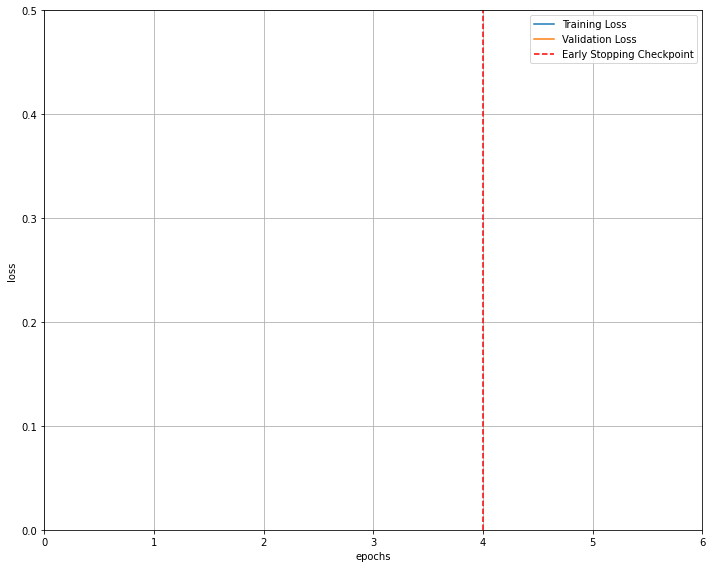

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1,len(avg_train_losses)+1),avg_train_losses, label='Training Loss')
plt.plot(range(1,len(avg_val_losses)+1),avg_val_losses,label='Validation Loss')

# validation loss의 최저값 지점을 찾기
minposs = avg_val_losses.index(min(avg_val_losses))+1
plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.ylim(0, 0.5) # 일정한 scale
plt.xlim(0, len(avg_train_losses)+1) # 일정한 scale
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
fig.savefig('loss_plot.png', bbox_inches = 'tight')

In [ ]:
test_acc = 0.0

model.eval()
for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(tqdm_notebook(test_dataloader)):
  token_ids = token_ids.long().to(device)
  segment_ids = segment_ids.long().to(device)
  valid_length= valid_length
  label = label.long().to(device)
  out = model(token_ids, valid_length, segment_ids)
  loss = loss_fn(out, label)
  test_acc += calc_accuracy(out, label)
  
print("test loss : {}".format(loss.data.cpu()))
print("test acc : {}".format(test_acc / (batch_id+1)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/1500 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


test loss : 1.4116147756576538
test acc : 0.7757333333333251


In [ ]:
def predict(predict_sentence):

    data = [predict_sentence, '0']
    dataset_another = [data]

    another_test = BERTDataset(dataset_another, 0, 1, tok, max_len, True, False)
    input_dataloader = torch.utils.data.DataLoader(another_test, batch_size=batch_size, num_workers=5)
    
    model.eval()

    for batch_id, (token_ids, valid_length, segment_ids, label) in enumerate(input_dataloader):
        token_ids = token_ids.long().to(device)
        segment_ids = segment_ids.long().to(device)

        valid_length= valid_length
        label = label.long().to(device)

        out = model(token_ids, valid_length, segment_ids)


        input_eval=[]
        for i in out:
            logits=i
            logits = logits.detach().cpu().numpy()

            if np.argmax(logits) == 0:
                input_eval.append("정보통신")
            elif np.argmax(logits) == 1:
                input_eval.append("필수소비재")
            elif np.argmax(logits) == 2:
                input_eval.append("자유소비재")
            elif np.argmax(logits) == 3:
                input_eval.append("금융")
            elif np.argmax(logits) == 4:
                input_eval.append("산업재")
            elif np.argmax(logits) == 5:
                input_eval.append("건강관리")
            elif np.argmax(logits) == 6:
                input_eval.append("에너지")
            elif np.argmax(logits) == 7:
                input_eval.append("부동산")
            elif np.argmax(logits) == 8:
                input_eval.append("커뮤니케이션서비스")

        print(">> 입력하신 기사는 " + input_eval[0] + " 관련 기사입니다.")

#5. Model demonstrate

In [ ]:
end = 1
while end == 1 :
    sentence = input("기사를 입력해주세요 : ")
    if sentence == "끝" :
        break
    predict(sentence)
    print("\n")

기사를 입력해주세요 : 샤오미가 중저가형 스마트폰 '레드미노트11 프로 5G'와 '레드미노트11'을 이달 중 한국 시장에 출시한다.  5일 업계에 따르면 이날 샤오미는 레드미노트11 프로 5G와 레드미 노트 11을 공개했다. 이날 행사에서 샤오미는 삼성과 애플을 공개 저격하며 자사 신제품의 우수성을 강조했다.  우선 레드미노트11 프로 5G는 트리플(3개) 카메라를 탑재했다. 메인 카메라는 1억800만 화소, 초광각 카메라는 800만 화소, 매크로 카메라는 200만 화소다. 전면 카메라는 1600만화소다.  이 제품은 6.67인치 화면에 최대 120Hz 주사율, 5000mAh 대용량 배터리, 67W 고속충전을 지원하고, 스냅드래곤 695 칩셋을 적용했다.  LTE 버전으로 출시되는 레드미노트11은 6.43인치 화면과 5000만 화소 메인 카메라, 800만 화소 초광각 카메라, 200만 화소 매크로 카메라, 200만 화소 심도 카메라 등을 포함한 쿼드(4개) 카메라를 탑재했다. 전면 카메라는 1300만 화소다. 5000mAh 배터리와 33W 고속 충전 등을 지원한다.


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


>> 입력하신 기사는 정보통신 관련 기사입니다.


기사를 입력해주세요 : 디슨모터스 컨소시엄이 쌍용자동차 인수에 대한 의지를 강하게 나타냈다.  에디슨모터스 컨소시엄은 지난달 29일 쌍용차 관리인 정용원이 제출한 회생계획안 배제 결정에 대해 특별항고를 대법원에 제기했다고 지난 4일 공시했다.  에디슨모터스 컨소시엄은 지난달 28일 쌍용차의 계약 해제 통보에 대해 ‘쌍용차 관리인 정용원의 일방적인 계약 해제 통보는 무효이며 에디슨모터스 컨소시엄의 계약자 지위가 유지되므로 해제 통보 효력을 정지해 달라’는 취지의 가처분 신청을 했다.  쌍용차 관리인의 계약금 몰취(몰수) 시도를 막기 위해 이미 지급한 계약금(304억8000만원)의 출금 금지 청구도 함께 냈다.  에디슨모터스 컨소시엄 관계자는 5일 보도자료를 통해 “대법원 항고사건의 경우 최소 2~3개월이 소요되는 점을 감안하면 에디슨모터스 컨소시엄을 배제하고는 쌍용차 인수절차를 회생절차 종료기한 내 진행하는 것은 불가능할 것"이라며 “특별항고에 대한 대법원 판결이 확정되기 전까지는 쌍용차는 새 인수자와 인수계약 체결이 불가능할 것으로 판단된다”고 말했다.  이어 "자산 4500억원, 매출 2300억원 대 거래소 기업인 금호에이치티가 에디슨모터스 컨소시엄에 참여 의향을 밝혔다”고 밝혔다. 금호에이치티는 자동차용 발광다이오드(LED) 조명 전문기업이다.  에디슨모터스는 쌍용차가 회생계획 법정인가 시한 내 새로운 인수자를 찾아 관계인 집회를 열고 최종 인가를 받긴 힘들 것으로 보고 있다. 이에 재무적 투자자(FI)를 새롭게 구해 자금력을 입증하고, 법원의 인용 결정을 받는다면 다시 인수합병(M&A) 기회가 있다고 판단한 것이다.  에디슨모터스 관계자는 “기존 에디슨모터스 컨소시엄에 새로운 참여자가 확보되면서 컨소시엄이 한층 탄탄해지고, 추가로 1~2곳 기업을 참여시킬 예정"이라며 "만일 에디슨모터스 컨소시엄이 인수인 지위를 잃더라도 이들 기업들과 새 컨소시엄을 구성해서 쌍용차 인수를 위해 끝까지 노력하겠다"고 강조했